<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [12]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Companies Bar Plot (2.20.1)

### 📌 `nlargest()` Fonksiyonunun Kullanım Nedeni

- `groupby(...).median()` ifadesi, her şirketin ortanca (medyan) maaşını verir.
- Ancak biz sadece **en yüksek maaş veren ilk 5 şirketi** analiz etmek istiyoruz.
- Bu nedenle:
  - `nlargest(5)` fonksiyonu kullanılarak,
  - Medyan maaş değeri en yüksek olan 5 şirket seçilir.
- Bu seçim, veri analizinde "öncelikli, öne çıkan veriyi" izole etmek için önemlidir.

---

### 📌 `reset_index()` Fonksiyonunun Kullanım Nedeni

- `groupby(...).median()` sonrası elde edilen veri bir **pandas Series**'idir ve şirket isimleri index konumundadır.
- `sns.barplot()` gibi Seaborn fonksiyonları, doğrudan **DataFrame** (yani sütunlardan oluşan tablo) ile çalışır.
- `reset_index()`:
  - Index’te bulunan `company_name` alanını tekrar normal bir sütun haline getirir.
  - Böylece elimizde:
    - Bir sütunda şirket isimleri,
    - Diğer sütunda maaşlar olan iki sütunlu bir **DataFrame** oluşur.
- Bu adım olmazsa, Seaborn barplot çalışmaz ve `TypeError` hatası alınır.

---

### ✅ Özetle:

- `nlargest(5)` → Sadece en yüksek 5 medyan maaşlı şirketi seçmek için.
- `reset_index()` → Veriyi `DataFrame` formatına dönüştürüp Seaborn ile uyumlu hale getirmek için.


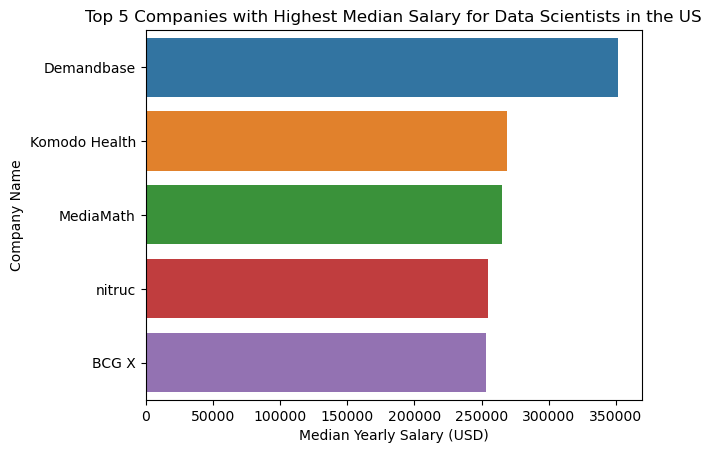

In [23]:
df_DS_US = df[(df["job_title_short"]=="Data Scientist") & (df["job_location"] == "United States")].copy()
df_DS_US = df_DS_US.dropna(subset=["salary_year_avg"])
top_companies = df_DS_US.groupby("company_name")["salary_year_avg"].median().nlargest(5).reset_index()

#Aşağıdaki 3 renk kodu da kullanılır.
sns.barplot(data=top_companies, x="salary_year_avg", y="company_name", hue="company_name", dodge=False) # hue= renklendirilmesini sağladı, dodge=False dersen çubuklar yan yana değil, üst üste düzgün dizilir.
#sns.barplot(data=top_companies, x="salary_year_avg", y="company_name", palette="pastel")
#sns.barplot(data=top_companies, x="salary_year_avg", y="company_name", palette="muted")


plt.title("Top 5 Companies with Highest Median Salary for Data Scientists in the US")
plt.xlabel("Median Yearly Salary (USD)")
plt.ylabel("Company Name")
plt.show()


---

## 🟨 Data Scientist Salary Histogram (2.20.2)

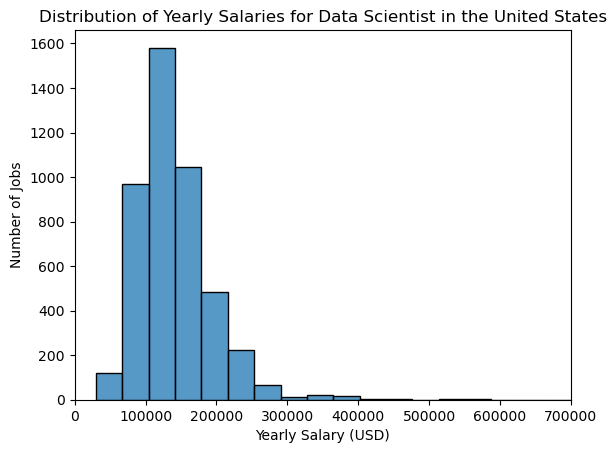

In [39]:
us_ds_jobs = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].copy()
us_ds_jobs = us_ds_jobs.dropna(subset=["salary_year_avg"])

# Plot histogram for yearly average salary
sns.histplot(us_ds_jobs["salary_year_avg"], bins=25, kde=False)
plt.title("Distribution of Yearly Salaries for Data Scientist in the United States")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salary (USD)")
plt.xlim(0,700000)
plt.show()

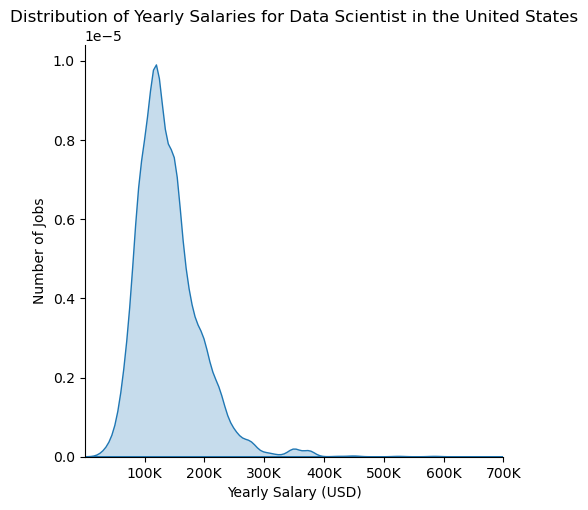

In [40]:
#BENİM YAZDIĞIM KOD: 
df_DS_US = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].dropna(subset=["salary_year_avg"]).copy()
sns.displot(df_DS_US["salary_year_avg"], kind="kde", fill=True, common_norm=False)
plt.xlim(25,700000)
plt.title("Distribution of Yearly Salaries for Data Scientist in the United States")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salary (USD)")
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))

---

## 🟨 Data Roles Salary Box Plot (2.20.3)

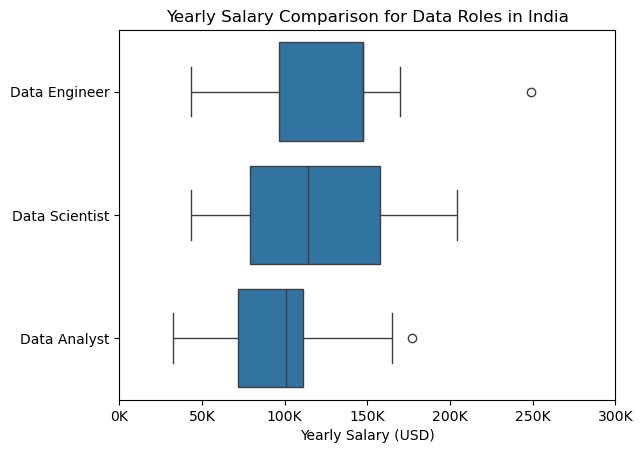

In [53]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_da_ind = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "India")].copy()
df_da_ind = df_da_ind.dropna(subset=["salary_year_avg"])

sns.boxplot(data=df_da_ind, x="salary_year_avg", y="job_title_short")

plt.title("Yearly Salary Comparison for Data Roles in India")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")

plt.xlim(0,300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K')))
plt.show()

/var/folders/8p/5x_4dm3s1s9dfl4ncvnchlv00000gn/T/ipykernel_5122/495354684.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert=False)


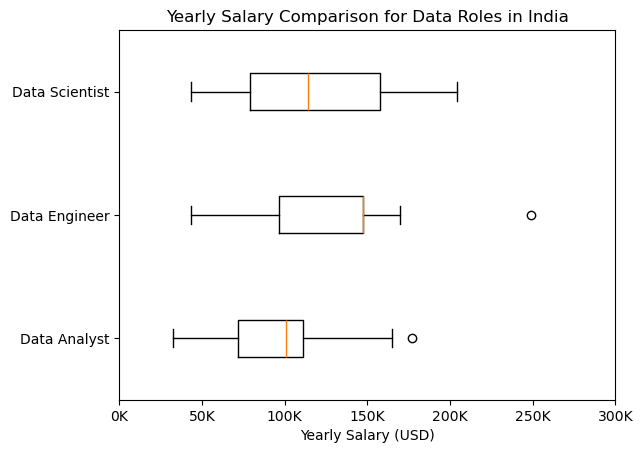

In [52]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_da_ind = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "India")].copy()
df_da_ind = df_da_ind.dropna(subset=["salary_year_avg"])

job_list = [df_da_ind[df_da_ind["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]
plt.boxplot(job_list, labels = job_titles, vert=False)

plt.xlim(0,300000)
plt.title("Yearly Salary Comparison for Data Roles in India")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()


---

## 🟨 Salary Distribution for United States (2.20.4)

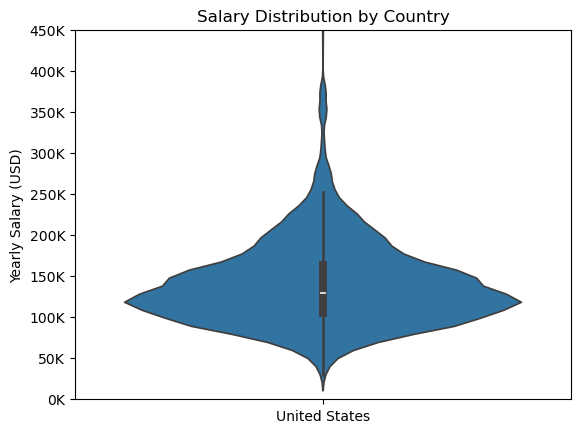

In [ ]:
df_ds_us = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].dropna(subset=["salary_year_avg"]).copy()

sns.violinplot(data=df_ds_us, x="job_country", y="salary_year_avg")
plt.title("Salary Distribution by Country")
plt.ylabel("Yearly Salary (USD)")
plt.xlabel("")
plt.ylim(0,450000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))
plt.show()


---